<a href="https://colab.research.google.com/github/joemakary/Application/blob/master/GUC_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC NETW 1003 Kmeans Assginmnet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function

import required libraries

In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function

write a function to calculate the distance between a set of cluster centroids and all the data points

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type)
* The function shoud be able to handel data points with any number of features and any number of points
* The function should be able to handle any K number of cluster centroids
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two
    - Ecluidian distance
    - Pearson correlation distance
  

In [ ]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    if Distance_Type == 'Euclidean':
        # Calculate Euclidean distances
        Cluster_Distance = np.sqrt(((Data_points[:, np.newaxis] - Cluster_Centroids)**2).sum(axis=2))
    elif Distance_Type == 'Pearson':
        # Calculate Pearson correlation distances
        mean_data = np.mean(Data_points, axis=1, keepdims=True)
        mean_centroids = np.mean(Cluster_Centroids, axis=1, keepdims=True)
        centered_data = Data_points - mean_data
        centered_centroids = Cluster_Centroids - mean_centroids
        numerator = np.matmul(centered_data, centered_centroids.T)
        denominator = np.sqrt(np.sum(centered_data**2, axis=1, keepdims=True) * np.sum(centered_centroids**2, axis=1, keepdims=True).T)
        Cluster_Distance = 1 - (numerator / denominator)
    else:
        raise ValueError("Distance_Type must be 'Euclidean' or 'Pearson'.")

    return Cluster_Distance


> ### 1.2. Code for K means function

> Loop until a stopping condition

> > in the loop do the following
> > 1. Cluster Assginmnet
> > > * Use the GUC_Distance to calculate between each cluster head and all the points
> > > * Find the value and index of the minimum distance  for each row.
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center)

In [ ]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    # Initialize centroids randomly
    centroids = Data_points[np.random.choice(Data_points.shape[0], size=Number_of_Clusters, replace=False)]

    # Loop until stopping condition is met
    while True:
        # Cluster Assignment
        Final_Cluster_Distance = GUC_Distance(centroids, Data_points, Distance_Type)
        cluster_assignments = np.argmin(Final_Cluster_Distance, axis=1)

        # Calculate mean square distance for each cluster
        mean_square_distances = np.zeros(Number_of_Clusters)
        for i in range(Number_of_Clusters):
            cluster_points = Data_points[cluster_assignments == i]
            mean_square_distances[i] = np.mean(np.sum((cluster_points - centroids[i])**2, axis=1))

        # Stopping condition based on change in mean square distances
        if 'prev_mean_square_distances' in locals():
            if np.sum(np.abs(mean_square_distances - prev_mean_square_distances)) < 1e-4:
                break

        # Update centroids
        for i in range(Number_of_Clusters):
            cluster_points = Data_points[cluster_assignments == i]
            centroids[i] = np.mean(cluster_points, axis=0)

        # Store mean square distances for next iteration
        prev_mean_square_distances = mean_square_distances.copy()

    # Calculate Cluster Metric (Distortion Function)
    Cluster_Metric = np.sum(mean_square_distances)


    return [ Final_Cluster_Distance , Cluster_Metric ]

## 2. Display Results

* below is a an example fuction that displayes Clusters in 2D

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures

* The function is a helper function that is originaly be found in
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import itertools

> #### 2.1. helper Display function

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:

def display_n_clusters(X, km=[], num_clusters=0):

    num_dimensions = X.shape[1]
    color = 'brgcmyk'  # List of colors
    alpha = 0.5  # Opacity of points
    s = 20  # Size of points

    # Calculate unique combinations of pairs of dimensions
    combinations = list(itertools.combinations(range(num_dimensions), 2))
    num_subplots = len(combinations)

    # Create subplots
    fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    if num_subplots == 1:  # If there's only one subplot, convert axs to a list
        axs = [axs]

    # Iterate over unique combinations of pairs of dimensions
    for idx, (dim1, dim2) in enumerate(combinations):
        ax = axs[idx]  # Get the current subplot

        # Plot data points
        if num_clusters == 0:
            ax.scatter(X[:, dim1], X[:, dim2], c=color[0], alpha=alpha, s=s)
        else:
            for i in range(num_clusters):
                ax.scatter(X[km.labels_ == i, dim1], X[km.labels_ == i, dim2], c=color[i], alpha=alpha, s=s)
                ax.scatter(km.cluster_centers_[i, dim1], km.cluster_centers_[i, dim2], c=color[i], marker='x', s=100)

        # Set labels and title
        ax.set_xlabel('Feature ' + str(dim1 + 1))
        ax.set_ylabel('Feature ' + str(dim2 + 1))
        ax.set_title('Features ' + str(dim1 + 1) + ' vs ' + str(dim2 + 1))

    plt.show()

> #### 2.2. Example 1 : Circular Data Gen and display

* below is an example of how to use the funciton
  *  prepare the figure size and background
   > * this part can be replaced by a number of subplots
  
  * Produce a data set that represent the x and y o coordinates of a circle
   > * this part can be replaced by data that you import froma file
  
  * Data is displayed
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction

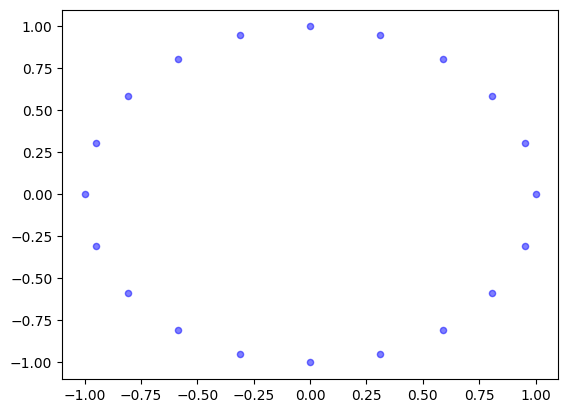

In [ ]:
# prepare the figure sise and background
# this part can be replaced by a number of subplots
#plt.rcParams['figure.figsize'] = [8,8]
#sns.set_style("whitegrid")
#sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle
# this part can be replaced by data that you import froma file
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction
display_cluster(X)


> #### 2.3. Example 2 : Multi blob Data Gen and display

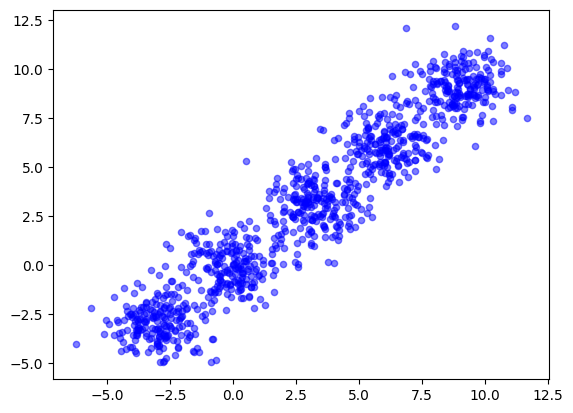

In [ ]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)


#### 2.3. Example 3 : moons Data Gen and display

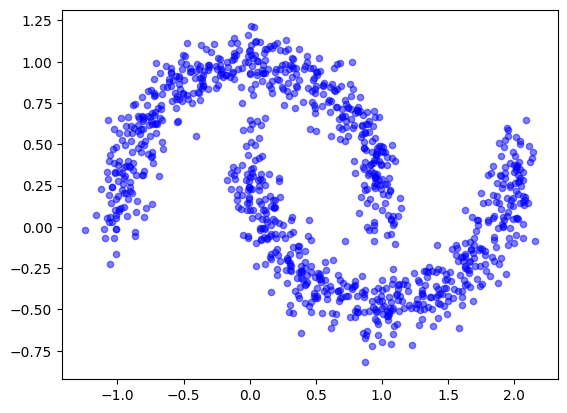

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)


## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps

In [ ]:
def test_kmeans_on_2d_data(X, distance_type='Euclidean'):

    # Apply GUC_Kmean function for varying numbers of cluster centroids
    num_clusters_range = range(2, 11)  # Range of cluster numbers from 2 to 10
    cluster_metrics = []

    for num_clusters in num_clusters_range:
        # Apply GUC_Kmean to the 2D data
        Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, distance_type)
        cluster_metrics.append(Cluster_Metric)

    # Plot the cluster performance metric versus the number of clusters
    plt.figure(figsize=(10, 6))
    plt.plot(num_clusters_range, cluster_metrics, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title('Cluster Performance Metric vs. Number of Clusters')
    plt.grid(True)
    plt.show()




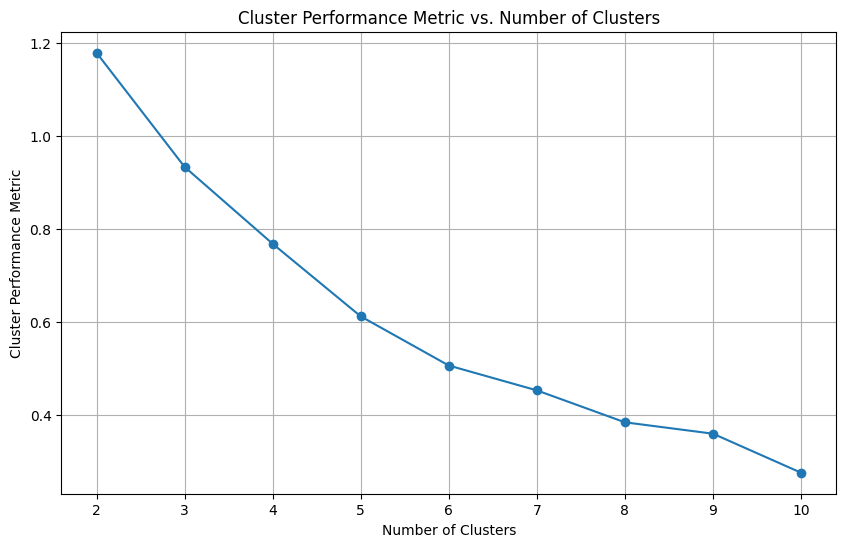

In [ ]:
# Example usage:
# Call this function with your example datasets (X_example1, X_example2, X_example3) and the desired distance type
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
test_kmeans_on_2d_data(X, distance_type='Euclidean')



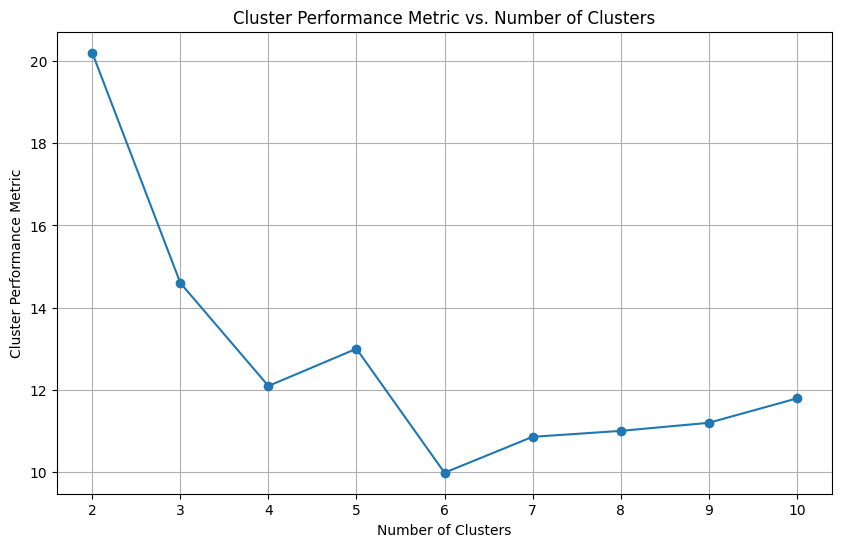

In [ ]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
test_kmeans_on_2d_data(X, distance_type='Euclidean')

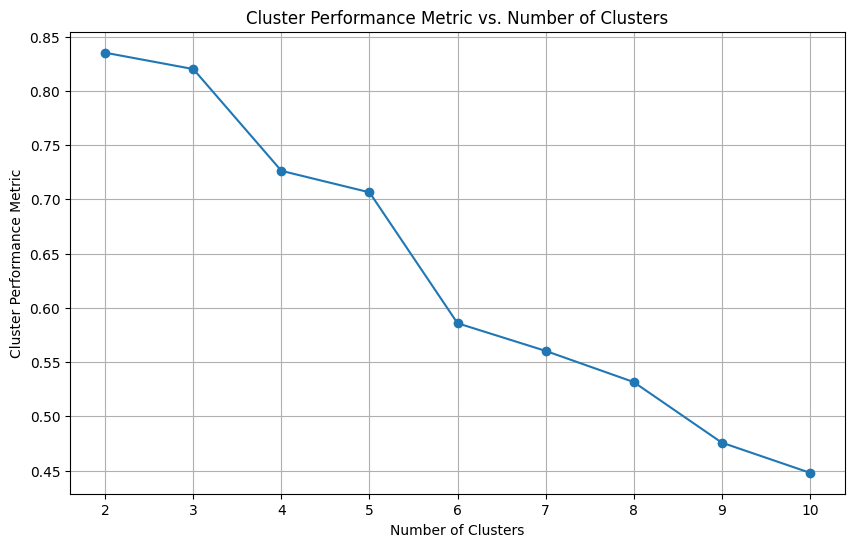

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
test_kmeans_on_2d_data(X, distance_type='Euclidean')

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps

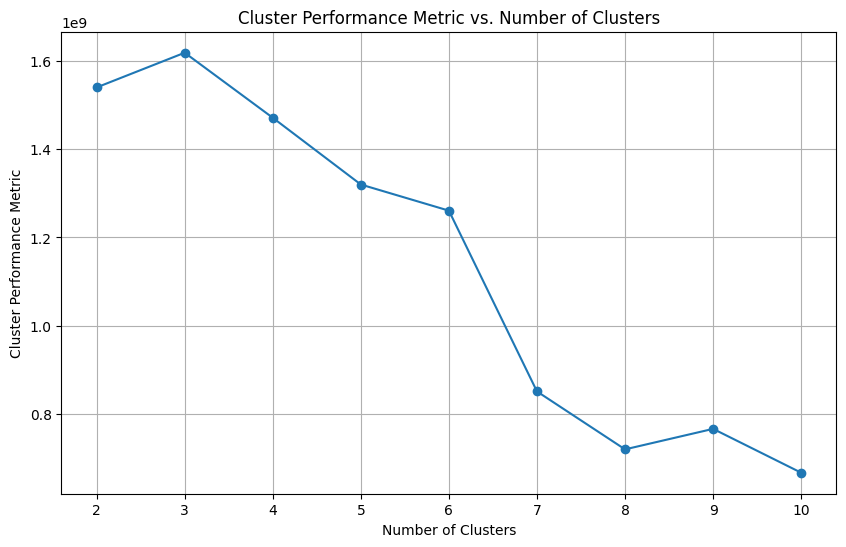

In [ ]:

# Load the customer dataset (replace 'customer_data.csv' with the actual filename)
customer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer data.csv', index_col=0)

# Extract relevant features for clustering
X_customer = customer_data.values
test_kmeans_on_2d_data(X_customer)